### Reference

[Naive Bayes Classifier From Scratch](https://chrisalbon.com/machine-learning/naive_bayes_classifier_from_scratch.html)

In [1]:
import pandas as pd
import numpy as np

### Training Data

Compute probability distribution, mean, variance, likelihood from Training Data.

In [2]:
# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


### Test Data

> we know the height, weight and foot_size but don't know the gender.

> We want to predict the gender.

In [3]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data
person

,Height,Weight,Foot_Size
0,6,130,8


### Bayes Theorem

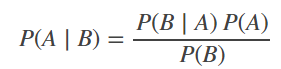

### Classification with Bayes Theorem

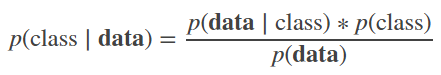

> **class** is a particular class (e.g. male)

> **data** is an observation's data

> p(class ∣ data) is called the **posterior**

> p(data | class) is called the **likelihood**

> p(class) is called the **prior**

> p(data) is called the **marginal probability**


#### Posterior

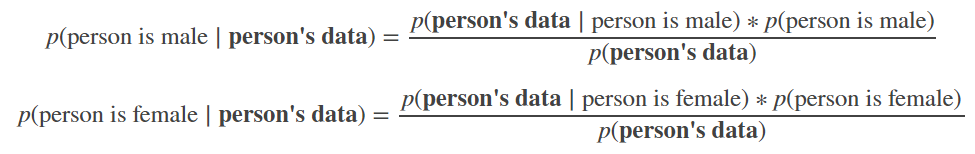

### Gaussian Naive Bayes Classifier

> A gaussian naive bayes is probably the most popular type of bayes classifier. To explain what the name means, let us look at what the bayes equations looks like when we apply our two classes (male and female) and three feature variables (height, weight, and footsize):

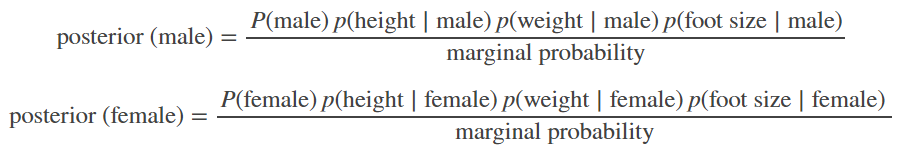

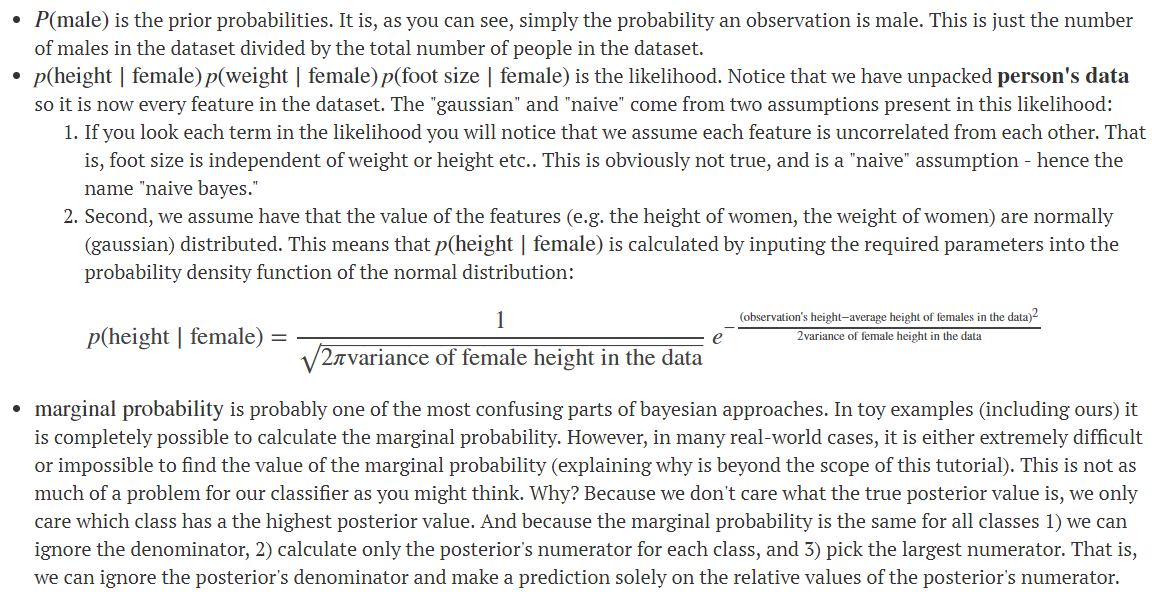

### Make it in codes!

In [5]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of females
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

print('n_male = {}'.format(n_male))
print('n_female = {}'.format(n_female))
print('total_ppl = {}'.format(total_ppl))

n_male = 4
n_female = 4
total_ppl = 8


In [6]:
# Number of males divided by the total rows
P_male = n_male / total_ppl

# Number of females divided by the total rows
P_female = n_female / total_ppl

print('P_male = {}'.format(P_male))
print('P_female = {}'.format(P_female))

P_male = 0.5
P_female = 0.5


### Calculate Likelihood

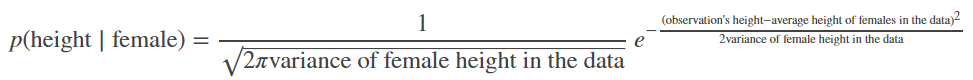

In [7]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [8]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [9]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for female
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# Variance for female
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

In [10]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))

    # return p
    return p

### Apply Bayes Classifier To New Data Point



In [11]:
# Numerator of the posterior if the unclassified observation is a male
P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

6.1970718438780782e-09

In [12]:
# Numerator of the posterior if the unclassified observation is a female
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

0.00053779091836300176

> Because the numerator of the posterior for female is greater than male, then we predict that the person is female.